In [16]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [3]:
# 2. Load Dataset (Assume CSV version is already downloaded locally)
data = pd.read_csv("emnist-letters-test1.csv", header=None)

In [4]:
labels = data.iloc[:, 0].values
images = data.iloc[:, 1:].values.reshape(-1, 28, 28)

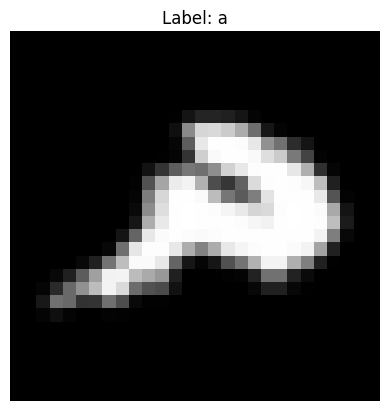

In [5]:
#Tampilkan salah satu gambar
index = 0
plt. imshow(np. rot90(images [index], k=3), cmap='gray')
plt.title(f"Label: {chr(labels[index] + 96)}") # 1=a, 2=b, ...
plt.axis('off')
plt.show()

In [6]:
print("Jumlah data:", len(images))
print("Dimensi gambar:", images[0].shape)

Jumlah data: 14800
Dimensi gambar: (28, 28)


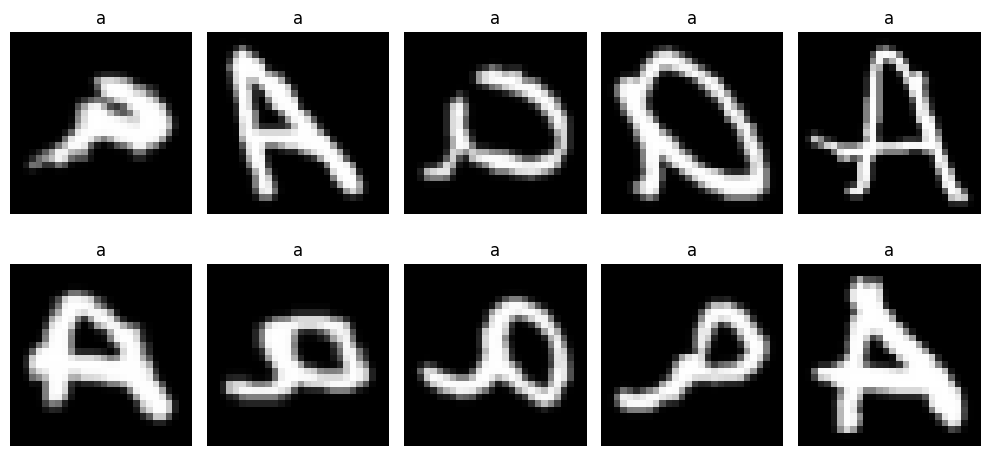

In [7]:
plt. figure(figsize=(10, 5)) 
for i in range (10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(np.rot90(images[i], k=3), cmap='gray')
        plt.title(chr(labels [i] + 96))
        plt.axis ('off')
plt.tight_layout()
plt.show()

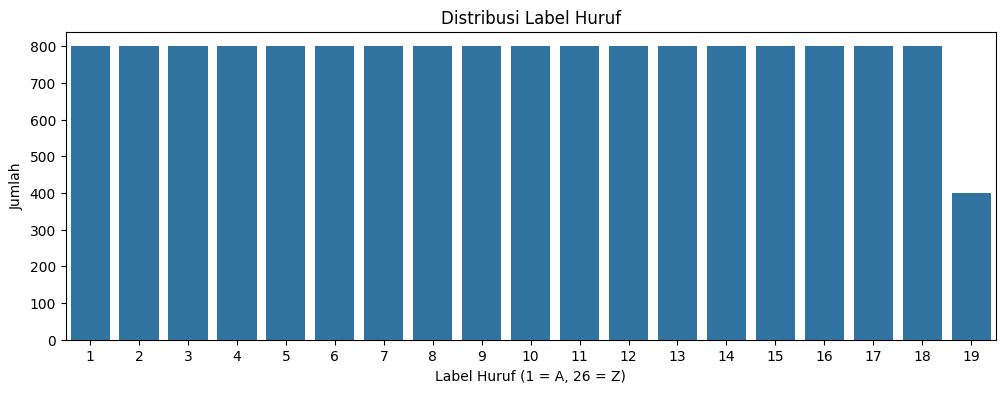

In [8]:
import seaborn as Sns
plt.figure(figsize=(12, 4)) 
sns.countplot(x=labels)
plt.title("Distribusi Label Huruf")
plt.xlabel("Label Huruf (1 = A, 26 = Z)")
plt.ylabel("Jumlah")
plt.show()

In [9]:
from sklearn.utils import shuffle
# Acak data dan ambil 200 sampel
shuffled_images, shuffled_labels = shuffle(images, labels, random_state=42)

sample_images = shuffled_images[:200]
sample_labels = shuffled_labels[:200]

In [10]:
from skimage. feature import hog
# Untuk menghemat waktu, ambil 200 data dulu
sample_images = shuffled_images[:200]
sample_labels = shuffled_labels[:200]

hog_features = []

for img in sample_images:
# Rotasi agar orientasi huruf benar
    img_rotated = np.rot90(img, k=3)
# Ekstraksi fitur HOG
    features = hog(img_rotated,
                   orientations=9,
                   pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2),
                   block_norm= 'L2-Hys',
                   visualize=False)
    hog_features.append (features)
hog_features = np.array (hog_features)
print("HOG features shape:", hog_features.shape)

HOG features shape: (200, 144)


In [25]:
from sklearn import svm 
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix 
from tqdm import tqdm

# 1) Pastikan dua variabel ini ada:
#    - hog_features: hasil ekstraksi HOG, shape (N, D)
#    - y           : array label, shape (N,)
X = hog_features
y = y  # atau ganti dengan nama variabel label-mu

clf = svm.SVC(kernel='linear', C=1.0)
loo = LeaveOneOut()

y_true, y_pred = [], []
for train_idx, test_idx in tqdm(loo.split(X), total=len(X)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]   # ambil label sebenarnya

    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)

    y_true.append(int(y_test[0]))       # ambil elemen
    y_pred.append(int(prediction[0]))

# Evaluasi
acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 174.49it/s]

Accuracy: 0.5550
Precision: 0.5727
F1 Score: 0.5410


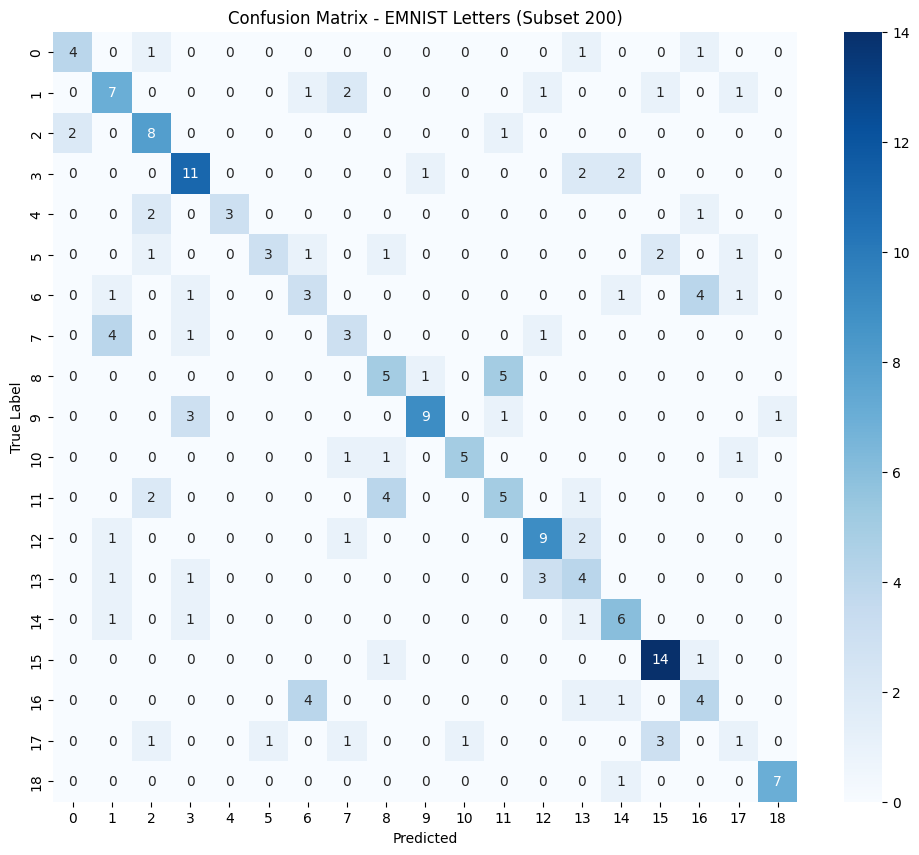

In [26]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap= 'Blues')
plt.title("Confusion Matrix - EMNIST Letters (Subset 200)")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.show()

In [27]:
import joblib 
joblib.dump(clf, 'model_svm_emnist.pkl ')

['model_svm_emnist.pkl ']

In [28]:
clf = joblib.load('model_svm_emnist.pkl')